Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3405 - val_loss: 0.1720
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1617 - val_loss: 0.1394
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1377 - val_loss: 0.1293
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1285 - val_loss: 0.1220
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1218 - val_loss: 0.1161
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1158 - val_loss: 0.1107
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1109 - val_loss: 0.1076
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1073 - val_loss: 0.1037
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1046 - val_loss: 0.1018
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1024 - val_loss: 0.1002
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1004 - val_loss: 0.0983
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

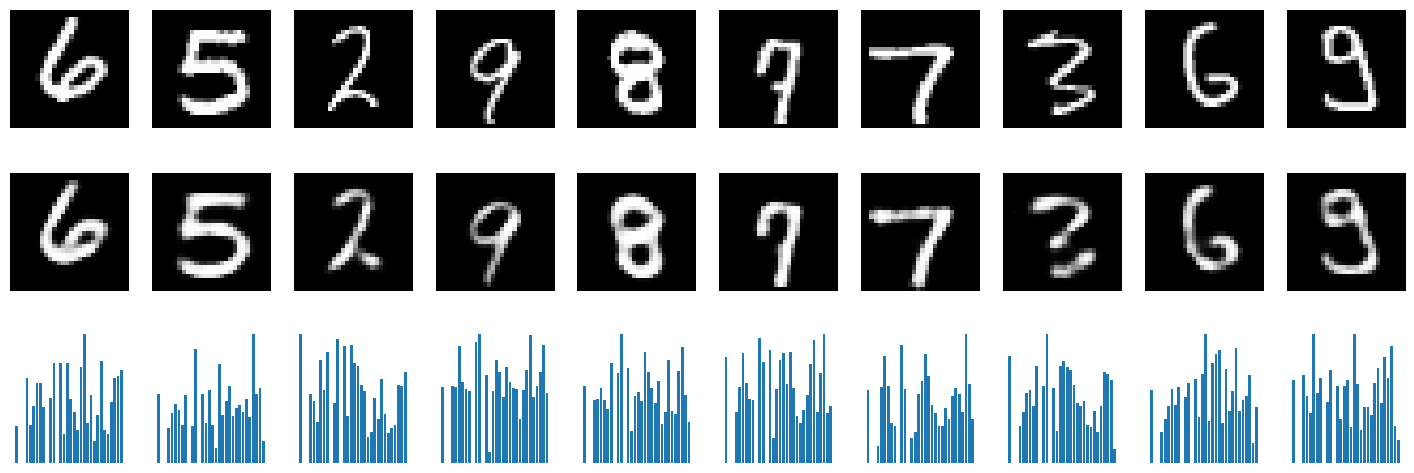

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics.pairwise import cosine_similarity
from skimage.metrics import structural_similarity as ssim
from math import log10
from tabulate import tabulate

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784) / 255.0, x_test.reshape(-1, 784) / 255.0

# Build autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, validation_data=(x_test, x_test))

# Get the reconstructed images
reconstructed = autoencoder.predict(x_test)

# Compute performance metrics
mse = mean_squared_error(x_test, reconstructed)
mae = mean_absolute_error(x_test, reconstructed)
rmse = np.sqrt(mse)
r2 = r2_score(x_test, reconstructed)
cos_sim = cosine_similarity(x_test, reconstructed)
ssim_value = np.mean([ssim(x_test[i].reshape(28, 28), reconstructed[i].reshape(28, 28), data_range=1) for i in range(x_test.shape[0])])
psnr_value = np.mean([10 * log10(1 / mean_squared_error(x_test[i], reconstructed[i])) for i in range(x_test.shape[0])])

# Prepare the metrics table
metrics_table = [
    ["Mean Squared Error (MSE)", mse],
    ["Mean Absolute Error (MAE)", mae],
    ["Root Mean Squared Error (RMSE)", rmse],
    ["R-Squared (R²)", r2],
    ["Cosine Similarity", np.mean(cos_sim)],
    ["Structural Similarity Index (SSIM)", ssim_value],
    ["Peak Signal-to-Noise Ratio (PSNR)", psnr_value]
]

# Display the metrics table
print(tabulate(metrics_table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# Visualization of original, reconstructed, and encoded images
indices = np.random.randint(0, x_test.shape[0], 10)
selected_images = x_test[indices]
reconstructed_images = autoencoder.predict(selected_images)
encoded_imgs = encoder.predict(selected_images)

# Plot the images
plt.figure(figsize=(18, 6))
for i in range(10):
    # Display original images
    plt.subplot(3, 10, i + 1)
    plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display reconstructed images
    plt.subplot(3, 10, i + 11)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Display encoded images (bars or scatter plot)
    plt.subplot(3, 10, i + 21)
    if encoded_imgs.shape[1] > 2:
        plt.bar(range(32), encoded_imgs[i])  # Plot bars for high dimensional encoding
    else:
        plt.scatter(encoded_imgs[i, 0], encoded_imgs[i, 1])  # Scatter plot for 2D encoding
    plt.axis('off')

plt.show()


In [2]:
!pip install numpy matplotlib tensorflow scikit-learn scikit-image tabulate